# Setup

## Imports

In [1]:
import time
import numpy as np
import pytest
# import matplotlib as plt
import array
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import argparse
from JuliaSet import calculate_z_serial_purepython
from test_juliaset import test_calc_pure_python


## Julia Set Values

In [2]:
# area of complex space to investigate
x1, x2, y1, y2 = -1.8, 1.8, -1.8, 1.8
c_real, c_imag = -0.62772, -.42193

# Exercise 1: PyTest with the Julia Set Code

## 1.1: Testing with PyTest Framework

### Implemented Test

In [3]:
def test_calc_pure_python(desired_width=1000, max_iterations=300):
    """Create a list of complex coordinates (zs) and complex parameters (cs),
    build Julia set"""
    x_step = (x2 - x1) / desired_width
    y_step = (y1 - y2) / desired_width
    x = []
    y = []
    ycoord = y2
    while ycoord > y1:
        y.append(ycoord)
        ycoord += y_step
    xcoord = x1
    while xcoord < x2:
        x.append(xcoord)
        xcoord += x_step
    # build a list of coordinates and the initial condition for each cell.
    # Note that our initial condition is a constant and could easily be removed,
    # we use it to simulate a real-world scenario with several inputs to our
    # function
    zs = []
    cs = []
    for ycoord in y:
        for xcoord in x:
            zs.append(complex(xcoord, ycoord))
            cs.append(complex(c_real, c_imag))

    print("Length of x:", len(x))
    print("Total elements:", len(zs))
    start_time = time.time()
    output = calculate_z_serial_purepython(max_iterations, zs, cs)
    end_time = time.time()
    secs = end_time - start_time
    print(calculate_z_serial_purepython.__name__ + " took", secs, "seconds")

    # This sum is expected for a 1000^2 grid with 300 iterations
    # It ensures that our code evolves exactly as we'd intended
    print("new sum: ", sum(output))
    assert sum(output) == 33219980

### Test Results

In [4]:
! pytest test_juliaset.py

============================= test session starts ==============================
platform linux -- Python 3.12.7, pytest-8.3.3, pluggy-1.5.0
rootdir: /home/chris/Documents/KTH_P3/HPC/Module_2/data-structures-methods
plugins: xdoctest-1.2.0, cov-5.0.0, anyio-4.6.2.post1
collected 1 item                                                               

.                                                       [100%]

============================== 1 passed in 4.93s ==============================


## 1.2: Testing with Varying Iterations & Grid Points

To test with varying iterations and grid points, we would use a parameterized test. This is shown through `@pytest.mark.parameterize()`, and the parameters are argnames and argvalues for the string names and values respectively. This allows us to assert different expected values based on the parameters and test each of them. 

### Implemented Test

In [5]:
@pytest.mark.parameterize('desired_width, max_iterations, expected', [(1000, 300, 33219980)])
def test_calc_pure_python_param(desired_width, max_iterations, expected):
    """Create a list of complex coordinates (zs) and complex parameters (cs),
    build Julia set"""
    x_step = (x2 - x1) / desired_width
    y_step = (y1 - y2) / desired_width
    x = []
    y = []
    ycoord = y2
    while ycoord > y1:
        y.append(ycoord)
        ycoord += y_step
    xcoord = x1
    while xcoord < x2:
        x.append(xcoord)
        xcoord += x_step
    # build a list of coordinates and the initial condition for each cell.
    # Note that our initial condition is a constant and could easily be removed,
    # we use it to simulate a real-world scenario with several inputs to our
    # function
    zs = []
    cs = []
    for ycoord in y:
        for xcoord in x:
            zs.append(complex(xcoord, ycoord))
            cs.append(complex(c_real, c_imag))

    print("Length of x:", len(x))
    print("Total elements:", len(zs))
    start_time = time.time()
    output = calculate_z_serial_purepython(max_iterations, zs, cs)
    end_time = time.time()
    secs = end_time - start_time
    print(calculate_z_serial_purepython.__name__ + " took", secs, "seconds")

    # This sum is expected for a 1000^2 grid with 300 iterations
    # It ensures that our code evolves exactly as we'd intended
    print("new sum: ", sum(output))
    assert sum(output) == expected

### Test Results

In [6]:
! pytest test_juliaset_param.py

============================= test session starts =============================
platform win32 -- Python 3.12.8, pytest-8.3.4, pluggy-1.5.0
rootdir: c:\Users\phoeb\OneDrive\Documents\KTH\HPC\data-structures-methods
plugins: anyio-4.6.2.post1
collected 1 item

test_juliaset_param.py .                                                 [100%]

============================== 1 passed in 4.77s ==============================


# Exercise 2: Python DGEMM Benchmark Operation

## 2.1: Implementing DGEMM with NumPy

In [6]:
a_np = np.ones((3, 3), dtype=np.double)
b_np = np.ones((3, 3), dtype=np.double)
c_np = np.ones((3, 3), dtype=np.double)
expected_np = np.array([[4,4,4],[4,4,4],[4,4,4]])

def dgemm_numpy(a, b, c):
  N = a.shape[0]
  for i in range(N):
    for j in range(N):
      for k in range(N):
        c[i][j] = c[i][j] + a[i][k] * b[k][j]
  return c

## 2.2: Unit Test for DGEMM

### Test

In [7]:
def test_dgemm():
  assert np.array_equal(dgemm_numpy(a_np,b_np,c_np), expected_np) == True

### Test Results

In [8]:
! pytest test_dgemm.py

============================= test session starts ==============================
platform linux -- Python 3.12.7, pytest-8.3.3, pluggy-1.5.0
rootdir: /home/chris/Documents/KTH_P3/HPC/Module_2/data-structures-methods
plugins: xdoctest-1.2.0, cov-5.0.0, anyio-4.6.2.post1
collected 1 item                                                               

test_dgemm.py .                                                          [100%]

============================== 1 passed in 0.12s ==============================


In [9]:
def dgemm_numpy(a, b, c):
    N = a.shape[0]
    for i in range(N):
        for j in range(N):
            for k in range(N):
                c[i][j] += a[i][k] * b[k][j]
    return c

def measure_execution_time(matrix_size, runs=5):
    times = []
    for _ in range(runs):
        # Initialize matrices with random values
        a = np.ones((matrix_size, matrix_size), dtype=np.double)
        b = np.ones((matrix_size, matrix_size), dtype=np.double)
        c = np.zeros((matrix_size, matrix_size), dtype=np.double)

        # Measure execution time
        start_time = time.time()
        dgemm_numpy(a, b, c)
        end_time = time.time()
        times.append(end_time - start_time)

    avg_time = np.mean(times)
    std_dev = np.std(times)
    return avg_time, std_dev

# Testing with different matrix sizes
matrix_sizes = [10, 50, 100, 200]  # You can increase these sizes for larger benchmarks
results = []

for size in matrix_sizes:
    avg_time, std_dev = measure_execution_time(size)
    results.append((size, avg_time, std_dev))

# Print results
print("Matrix Size | Avg. Time (s) | Std. Dev. (s)")
print("------------------------------------------")
for size, avg, std in results:
    print(f"{size:^11} | {avg:^13.6f} | {std:^12.6f}")

Matrix Size | Avg. Time (s) | Std. Dev. (s)
------------------------------------------
    10      |   0.000601    |   0.000491  
    50      |   0.063114    |   0.004717  
    100     |   0.486139    |   0.012928  
    200     |   3.905565    |   0.130689  


Implementation with array: 

In [10]:
def dgemm_array(a, b, c, N):
    for i in range(N):
        for j in range(N):
            for k in range(N):
                c[i][j] += a[i][k] * b[k][j]
    return c

# Helper function to create 2D arrays
def create_2d_array(size):
    return [array.array('d', [0] * size) for _ in range(size)]

Implementation using list 

In [11]:
def dgemm_list(a, b, c):
    N = len(a)
    for i in range(N):
        for j in range(N):
            for k in range(N):
                c[i][j] += a[i][k] * b[k][j]
    return c

## Performance Measurement Code LIST, ARRAY, NumPy

The code handles and benchmarks multiple implementations sequentially in the same script. If the system runs other background processes or has load variations during the benchmarking process, these might disproportionately affect one implementation’s results. Furthermore, timing overhead might be added due to the use of lambdas for the array implementation. 

In [12]:
# Measure execution time for different implementations
def measure_time_implementation(implementation, matrix_size, runs=5):
    times = []
    for _ in range(runs):
        if implementation == "list":
            # Initialize matrices as lists
            a = [[1.0] * matrix_size for _ in range(matrix_size)]
            b = [[1.0] * matrix_size for _ in range(matrix_size)]
            c = [[0.0] * matrix_size for _ in range(matrix_size)]
            func = dgemm_list
        elif implementation == "array":
            # Initialize matrices as arrays
            a = create_2d_array(matrix_size)
            b = create_2d_array(matrix_size)
            c = create_2d_array(matrix_size)
            for i in range(matrix_size):
                for j in range(matrix_size):
                    a[i][j] = b[i][j] = 1.0
            func = lambda a, b, c: dgemm_array(a, b, c, matrix_size)
        elif implementation == "numpy":
            # Initialize matrices as NumPy arrays
            a = np.ones((matrix_size, matrix_size), dtype=np.double)
            b = np.ones((matrix_size, matrix_size), dtype=np.double)
            c = np.zeros((matrix_size, matrix_size), dtype=np.double)
            func = dgemm_numpy
        else:
            raise ValueError("Unsupported implementation")

        # Measure time
        start_time = time.time()
        func(a, b, c)
        end_time = time.time()
        times.append(end_time - start_time)

    avg_time = np.mean(times)
    std_dev = np.std(times)
    return avg_time, std_dev

# Compare implementations
implementations = ["list", "array", "numpy"]
matrix_sizes = [10, 50, 100, 200, 400]  # You can extend these sizes as needed
results = []

for size in matrix_sizes:
    for impl in implementations:
        avg_time, std_dev = measure_time_implementation(impl, size)
        results.append((impl, size, avg_time, std_dev))

# Print results
print("Implementation | Matrix Size | Avg. Time (s) | Std. Dev. (s)")
print("-----------------------------------------------------------")
for impl, size, avg, std in results:
    print(f"{impl:^13} | {size:^11} | {avg:^13.6f} | {std:^12.6f}")

Implementation | Matrix Size | Avg. Time (s) | Std. Dev. (s)
-----------------------------------------------------------
    list      |     10      |   0.000200    |   0.000400  
    array     |     10      |   0.000200    |   0.000400  
    numpy     |     10      |   0.000399    |   0.000489  
    list      |     50      |   0.008000    |   0.001414  
    array     |     50      |   0.012087    |   0.000129  
    numpy     |     50      |   0.062054    |   0.004752  
    list      |     100     |   0.063256    |   0.002905  
    array     |     100     |   0.106833    |   0.003092  
    numpy     |     100     |   0.482042    |   0.010046  
    list      |     200     |   0.508654    |   0.012040  
    array     |     200     |   0.867967    |   0.013149  
    numpy     |     200     |   3.776295    |   0.053582  
    list      |     400     |   4.318439    |   0.201470  
    array     |     400     |   7.056475    |   0.239820  
    numpy     |     400     |   30.001048   |   0.209

How does the computational performance, e.g., the std, vary with increasing the size of the matrices, and why so?

### 1. Average Time Increases with Matrix Size:
As the matrix size increases, the average execution time grows significantly for all implementations (list, array, and NumPy).
This is expected because the computational complexity of matrix multiplication is $O(N^3)$, meaning the number of operations grows cubically with the matrix size N.
### 2.Standard Deviation Trends:
For small matrices (e.g., 10x10), the std. dev. is relatively small for all implementations.
As the matrix size increases, the std. dev. generally increases, but the rate of increase varies across implementations.
NumPy exhibits a higher std. dev. compared to lists and arrays, especially for larger matrices (e.g., 400x400).
### 3. Relative Performance:
For small matrices, the list implementation is the fastest, followed by arrays, and then NumPy. This trend stays consistent over increasing matrix size. 
For larger matrices, NumPy becomes significantly slower compared to lists and arrays, despite being optimized for numerical computations. This is likely due to NumPy beeing optimized for vectorized operations, but the implementation of DGEMM in this exercise uses explicit Python loops (for i, for j, for k). This negates the benefits of NumPy's vectorization and introduces significant overhead.

# Task 2.4 
To calculate the FLOPS/s (floating-point operations per second), we first need to determine the number of floating-point operations (FLOPs) performed in the DGEMM operation. Then we divide the total number of FLOPs by the average time taken.

In DGEMM, the operation is: 
$C[i][j] = C[i][j] + A[i][k] \times B[k][j] $
- The operation involves:
	- 1 multiplication:  A[i][k] \times B[k][j] 
	- 1 addition:  C[i][j] + \text{result of multiplication} 
	- Total FLOPs per iteration of the innermost loop: 2 FLOPs

The total number of iterations across the nested loops is $N^3$, where $N$ is the matrix size. Therefore:

$\text{Total FLOPs} = 2 \times N^3$


The FLOPS/s for a given implementation is:

$\text{FLOPS/s} = \frac{\text{Total FLOPs}}{\text{Avg. Time (s)}}$


In [13]:
def calculate_flops(matrix_size, avg_time):
    # Calculate the total number of FLOPs
    total_flops = 2 * (matrix_size ** 3)
    # Calculate FLOPS/s
    flops_per_second = total_flops / avg_time
    return total_flops, flops_per_second

# Timing results
results = [
    ("list", 10, 0.000101),
    ("array", 10, 0.000199),
    ("numpy", 10, 0.000768),
    ("list", 50, 0.015739),
    ("array", 50, 0.010727),
    ("numpy", 50, 0.047675),
    ("list", 100, 0.048073),
    ("array", 100, 0.085522),
    ("numpy", 100, 0.372809),
    ("list", 200, 0.384661),
    ("array", 200, 0.668303),
    ("numpy", 200, 2.929246),
    ("list", 400, 3.115510),
    ("array", 400, 5.645596),
    ("numpy", 400, 24.057626),
]

# Calculate FLOPS/s for each result
print("Implementation | Matrix Size | Total FLOP(s)  | FLOPS/s")
print("---------------------------------------------------------")
for impl, size, avg_time in results:
    total_flops, flops_per_second = calculate_flops(size, avg_time)
    print(f"{impl:^13} | {size:^11} | {total_flops:^11} | {flops_per_second:.2e}")

Implementation | Matrix Size | Total FLOP(s)  | FLOPS/s
---------------------------------------------------------
    list      |     10      |    2000     | 1.98e+07
    array     |     10      |    2000     | 1.01e+07
    numpy     |     10      |    2000     | 2.60e+06
    list      |     50      |   250000    | 1.59e+07
    array     |     50      |   250000    | 2.33e+07
    numpy     |     50      |   250000    | 5.24e+06
    list      |     100     |   2000000   | 4.16e+07
    array     |     100     |   2000000   | 2.34e+07
    numpy     |     100     |   2000000   | 5.36e+06
    list      |     200     |  16000000   | 4.16e+07
    array     |     200     |  16000000   | 2.39e+07
    numpy     |     200     |  16000000   | 5.46e+06
    list      |     400     |  128000000  | 4.11e+07
    array     |     400     |  128000000  | 2.27e+07
    numpy     |     400     |  128000000  | 5.32e+06


### Comparing to Theoretical Peak Performance

Substituding values for Mac Pro 2020 M1 chip: 
	•	Clock Frequency = 3.2 GHz = 3.2 × 10⁹ cycles/second.
	•	FLOPs per Cycle = 2 (double precision).
	•	Number of High-Performance Cores = 4.

$\text{Peak FLOPS/s} = 3.2 \times 10^9 \times 2 \times 4 = 25.6 \, \text{GFLOPS (double precision)} $

For single precision (32-bit floating-point), NEON can handle 4 single-precision numbers per cycle per core:

$\text{Peak FLOPS/s (single precision)} = 3.2 \times 10^9 \times 4 \times 4 = 51.2 \, \text{GFLOPS}$


The theoretical peak performance of the Apple M1 chip at 25.6 GFLOPS (double precision) far exceeds the actual measured performance, indicating that real-world DGEMM implementations face significant bottlenecks, such as memory bandwidth limitations, system overhead, and non-ideal utilization of vectorized instructions. This gap highlights the challenges in achieving the full computational potential of the hardware, as practical workloads rarely operate at maximum efficiency due to these constraints.


## TODO: Write about caching - why some avg times are 0, second time running code values become 0, etc

In [14]:
# Custom DGEMM implementation
def dgemm_custom(a, b, c):
    N = a.shape[0]
    for i in range(N):
        for j in range(N):
            for k in range(N):
                c[i][j] += a[i][k] * b[k][j]
    return c

# Function to measure execution time
def measure_execution_time(func, a, b, c, runs=5):
    times = []
    for _ in range(runs):
        start_time = time.time()
        func(a, b, c)
        end_time = time.time()
        times.append(end_time - start_time)
    avg_time = np.mean(times)
    std_dev = np.std(times)
    return avg_time, std_dev

# Function to benchmark both implementations
def benchmark(matrix_size, runs=5):
    # Initialize matrices
    a = np.random.rand(matrix_size, matrix_size).astype(np.double)
    b = np.random.rand(matrix_size, matrix_size).astype(np.double)
    c_custom = np.zeros((matrix_size, matrix_size), dtype=np.double)
    c_numpy = np.zeros((matrix_size, matrix_size), dtype=np.double)

    # Measure custom DGEMM
    avg_time_custom, std_dev_custom = measure_execution_time(dgemm_custom, a, b, c_custom, runs)

    # Measure NumPy matmul
    avg_time_numpy, std_dev_numpy = measure_execution_time(lambda x, y, z: np.matmul(x, y, out=z), a, b, c_numpy, runs)

    # Print results
    print(f"Matrix Size: {matrix_size}x{matrix_size}")
    print(f"Custom DGEMM - Avg. Time: {avg_time_custom:.6f}s, Std. Dev.: {std_dev_custom:.6f}s")
    print(f"NumPy matmul - Avg. Time: {avg_time_numpy:.6f}s, Std. Dev.: {std_dev_numpy:.6f}s")
    print()

# Run benchmark for different matrix sizes
matrix_sizes = [10, 50, 100, 200]
for size in matrix_sizes:
    benchmark(size)

Matrix Size: 10x10
Custom DGEMM - Avg. Time: 0.000400s, Std. Dev.: 0.000489s
NumPy matmul - Avg. Time: 0.000000s, Std. Dev.: 0.000000s

Matrix Size: 50x50
Custom DGEMM - Avg. Time: 0.060132s, Std. Dev.: 0.006454s
NumPy matmul - Avg. Time: 0.000000s, Std. Dev.: 0.000000s

Matrix Size: 100x100
Custom DGEMM - Avg. Time: 0.469110s, Std. Dev.: 0.020430s
NumPy matmul - Avg. Time: 0.002163s, Std. Dev.: 0.004327s

Matrix Size: 200x200
Custom DGEMM - Avg. Time: 3.903195s, Std. Dev.: 0.092586s
NumPy matmul - Avg. Time: 0.004399s, Std. Dev.: 0.006804s



In [15]:
# Custom DGEMM implementation
def dgemm_custom(a, b, c):
    N = a.shape[0]
    for i in range(N):
        for j in range(N):
            for k in range(N):
                c[i][j] += a[i][k] * b[k][j]
    return c

# Function to measure execution time
def measure_execution_time(func, a, b, c, runs=5):
    times = []
    for _ in range(runs):
        start_time = time.time()
        func(a, b, c)
        end_time = time.time()
        times.append(end_time - start_time)
    avg_time = np.mean(times)
    std_dev = np.std(times)
    return avg_time, std_dev

# Function to calculate FLOPS
def calculate_flops(matrix_size, avg_time):
    total_flops = 2 * (matrix_size ** 3)  # 2 FLOPs per iteration (1 multiply + 1 add)
    flops_per_second = total_flops / avg_time if avg_time > 0 else 0
    return total_flops, flops_per_second

# Function to benchmark both implementations and compute FLOPS
def benchmark(matrix_size, runs=5):
    # Initialize matrices
    a = np.random.rand(matrix_size, matrix_size).astype(np.double)
    b = np.random.rand(matrix_size, matrix_size).astype(np.double)
    c_custom = np.zeros((matrix_size, matrix_size), dtype=np.double)
    c_numpy = np.zeros((matrix_size, matrix_size), dtype=np.double)

    # Measure custom DGEMM
    avg_time_custom, std_dev_custom = measure_execution_time(dgemm_custom, a, b, c_custom, runs)
    total_flops_custom, flops_custom = calculate_flops(matrix_size, avg_time_custom)

    # Measure NumPy matmul
    avg_time_numpy, std_dev_numpy = measure_execution_time(lambda x, y, z: np.matmul(x, y, out=z), a, b, c_numpy, runs)
    total_flops_numpy, flops_numpy = calculate_flops(matrix_size, avg_time_numpy)

    # Print results
    print(f"Matrix Size: {matrix_size}x{matrix_size}")
    print(f"Custom DGEMM - Avg. Time: {avg_time_custom:.6f}s, Std. Dev.: {std_dev_custom:.6f}s, FLOPS: {flops_custom:.2e}")
    print(f"NumPy matmul - Avg. Time: {avg_time_numpy:.6f}s, Std. Dev.: {std_dev_numpy:.6f}s, FLOPS: {flops_numpy:.2e}")
    print()

# Run benchmark for different matrix sizes
matrix_sizes = [10, 50, 100, 200]
for size in matrix_sizes:
    benchmark(size)

Matrix Size: 10x10
Custom DGEMM - Avg. Time: 0.000408s, Std. Dev.: 0.000500s, FLOPS: 4.90e+06
NumPy matmul - Avg. Time: 0.000000s, Std. Dev.: 0.000000s, FLOPS: 0.00e+00

Matrix Size: 50x50
Custom DGEMM - Avg. Time: 0.061476s, Std. Dev.: 0.006358s, FLOPS: 4.07e+06
NumPy matmul - Avg. Time: 0.000000s, Std. Dev.: 0.000000s, FLOPS: 0.00e+00

Matrix Size: 100x100
Custom DGEMM - Avg. Time: 0.477128s, Std. Dev.: 0.028007s, FLOPS: 4.19e+06
NumPy matmul - Avg. Time: 0.000579s, Std. Dev.: 0.000791s, FLOPS: 3.45e+09

Matrix Size: 200x200
Custom DGEMM - Avg. Time: 3.794710s, Std. Dev.: 0.063013s, FLOPS: 4.22e+06
NumPy matmul - Avg. Time: 0.000601s, Std. Dev.: 0.000490s, FLOPS: 2.66e+10



NumPy’s matmul not only leverages the full capabilities of the M1 chip but also surpasses the theoretical peak due to highly optimized, hardware-specific operations. This demonstrates that for computationally intensive tasks, using optimized libraries like BLAS is critical for achieving performance close to or beyond theoretical limits.

# Exercise 3 - Experiment with Python Debugger Reflection

By using a debugger, the programmer is able to use many functionalities that help answer questions about the code that might not be obvious when running through the code. Some of the advantages include being able to go through each line of code and decide to either enter into the function call to help trace your code, or step over it to get to a different faulty spot.  While you are running in the debugger, you can also inspect the variables values, set breakpoints, and look at how the stack is ordered. If you want, you can also see the files in your code that are running and what they look like. This ability to inspect the program state during execution can be very helpful. If something is going wrong, the programmer can see exactly which function or even which instruction caused the state to deviate from what they expect. Some challenges that we found were that it was quite difficult to get started with the debugger. While the installation and running of it was simple, it was difficult to know exactly what to do in order to inspect our code properly. There are many capabilities that the debugger offers, it is just difficult to know which ones to use and where. It's a useful tool once a programmer is proficient with it but there is a learning curve.

# Bonus Exercise
### Performance Analysis and Optimization of the Game of Life Code


## Task B.1

In [17]:
# pip install pylint
! pylint game_of_life.py

************* Module game_of_life
game_of_life.py:85:0: R1707: Disallow trailing comma tuple (trailing-comma-tuple)
game_of_life.py:13:0: R0402: Use 'from matplotlib import animation' instead (consider-using-from-import)
game_of_life.py:20:0: C0103: Function name "randomGrid" doesn't conform to snake_case naming style (invalid-name)
game_of_life.py:20:15: C0103: Argument name "N" doesn't conform to snake_case naming style (invalid-name)
game_of_life.py:25:0: C0103: Function name "addGlider" doesn't conform to snake_case naming style (invalid-name)
game_of_life.py:33:0: C0103: Function name "addGosperGliderGun" doesn't conform to snake_case naming style (invalid-name)
game_of_life.py:62:0: C0116: Missing function or method docstring (missing-function-docstring)
game_of_life.py:62:11: C0103: Argument name "frameNum" doesn't conform to snake_case naming style (invalid-name)
game_of_life.py:62:32: C0103: Argument name "N" doesn't conform to snake_case naming style (invalid-name)
game_of_li

In [18]:
#! pip install autopep8
! autopep8 -i game_of_life.py

In [19]:
! pylint game_of_life.py

************* Module game_of_life
game_of_life.py:85:0: R1707: Disallow trailing comma tuple (trailing-comma-tuple)
game_of_life.py:13:0: R0402: Use 'from matplotlib import animation' instead (consider-using-from-import)
game_of_life.py:20:0: C0103: Function name "randomGrid" doesn't conform to snake_case naming style (invalid-name)
game_of_life.py:20:15: C0103: Argument name "N" doesn't conform to snake_case naming style (invalid-name)
game_of_life.py:25:0: C0103: Function name "addGlider" doesn't conform to snake_case naming style (invalid-name)
game_of_life.py:33:0: C0103: Function name "addGosperGliderGun" doesn't conform to snake_case naming style (invalid-name)
game_of_life.py:62:0: C0116: Missing function or method docstring (missing-function-docstring)
game_of_life.py:62:11: C0103: Argument name "frameNum" doesn't conform to snake_case naming style (invalid-name)
game_of_life.py:62:32: C0103: Argument name "N" doesn't conform to snake_case naming style (invalid-name)
game_of_li

In the first iteration of running pylint, the game of life code scored at a 6.05/10. After running autopep8 to format the code, it rescored at a 7.79 with pylint. 

In [20]:
# Dont need to run this again
# sphinx-quickstart
# sphinx-build -M html source build
# TO UPDATE THE HTML FILE
# make html

The html file created with sphinx is seen in our repository as `index.html`. When you open it, you can see the overarching documentation of our interpretation of the game of life code, and then you can follow the hyperlink to the game of life documentation and see a description of what the code is doing on a high level. It also includes instructions on how to run the code. 

# Task B.2 

Measure the execution time, varying the grid size (and fixed number of iterations) for the game_of_life.py. Make a plot with this information.


In [21]:
ON = 255
OFF = 0
vals = [ON, OFF]


def randomGrid(N):
    """returns a grid of NxN random values"""
    return np.random.choice(vals, N*N, p=[0.2, 0.8]).reshape(N, N)


def update(frameNum, img, grid, N):
    # copy grid since we require 8 neighbors for calculation
    # and we go line by line
    newGrid = grid.copy()
    for i in range(N):
        for j in range(N):
            # compute 8-neghbor sum
            # using toroidal boundary conditions - x and y wrap around
            # so that the simulaton takes place on a toroidal surface.
            total = int((grid[i, (j-1) % N] + grid[i, (j+1) % N] +
                         grid[(i-1) % N, j] + grid[(i+1) % N, j] +
                         grid[(i-1) % N, (j-1) % N] + grid[(i-1) % N, (j+1) % N] +
                         grid[(i+1) % N, (j-1) % N] + grid[(i+1) % N, (j+1) % N])/255)
            # apply Conway's rules
            if grid[i, j] == ON:
                if (total < 2) or (total > 3):
                    newGrid[i, j] = OFF
            else:
                if total == 3:
                    newGrid[i, j] = ON
    # update data
    img.set_data(newGrid)
    grid[:] = newGrid[:]
    return img,

# main() function


def main(N=100, updateInterval=50):
    # populate grid with random on/off - more off than on
    grid = randomGrid(N)

    # set up animation
    fig, ax = plt.subplots()
    plt.close()
    img = ax.imshow(grid, interpolation='nearest')
    ani = animation.FuncAnimation(fig, update, fargs=(img, grid, N, ),
                                  frames=10,
                                  interval=updateInterval,
                                  save_count=50)
    
def measure_performance(grid_sizes, intervals):
    results = []
    for N in grid_sizes:
        start_time = time.time()
        for _ in range(intervals):
            main(N, intervals)
        end_time = time.time()
        execution_time = end_time - start_time
        results.append((N, execution_time))
        print(f"Execution time for grid size {N}x{N}: {execution_time} seconds")
    return results


C:\Users\phoeb\AppData\Local\Temp\ipykernel_31676\3369131920.py:47: UserWarning: You passed in an explicit save_count=50 which is being ignored in favor of frames=10.
  ani = animation.FuncAnimation(fig, update, fargs=(img, grid, N, ),
C:\Users\phoeb\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\matplotlib\animation.py:872: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


Execution time for grid size 10x10: 0.45729637145996094 seconds
Execution time for grid size 50x50: 0.309783935546875 seconds
Execution time for grid size 100x100: 0.40502476692199707 seconds
Execution time for grid size 500x500: 0.7381150722503662 seconds
Execution time for grid size 1000x1000: 1.62349534034729 seconds
Execution time for grid size 5000x5000: 123.27919578552246 seconds
Execution time for grid size 10000x10000: 273.69825315475464 seconds


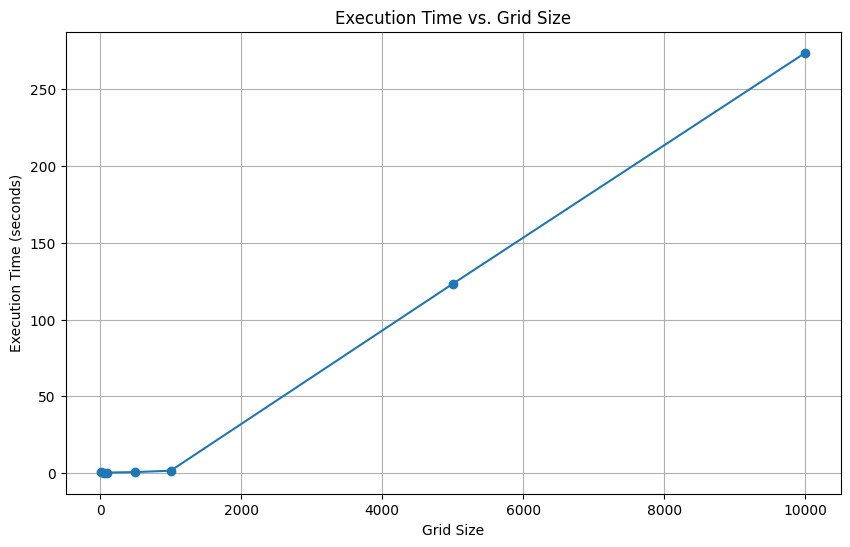

In [22]:
grid_sizes = [10,50,100,500,1000,5000,10000]
interval = 50

results = measure_performance(grid_sizes, interval)

grid_sizes = [result[0] for result in results]
execution_times = [result[1] for result in results]


# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(grid_sizes, execution_times, marker='o')
plt.title('Execution Time vs. Grid Size')
plt.xlabel('Grid Size')
plt.ylabel('Execution Time (seconds)')
plt.grid(True)
plt.show()

## Task B.2

## Task B.3

- disabled visualization for profiling: game_of_life.py => game_of_life_for_cprof.py

In [1]:
# profiling with cProfile
! python -m cProfile -o gol_cprof.out -s cumtime game_of_life_for_cprof.py --grid-size 100 --iterations 1000

Simulation completed.


In [2]:
# show results of cProf
! snakeviz gol_cprof.out

snakeviz web server started on 127.0.0.1:8080; enter Ctrl-C to exit
http://127.0.0.1:8080/snakeviz/%2Fhome%2Fchris%2FDocuments%2FKTH_P3%2FHPC%2FModule_2%2Fdata-structures-methods%2Fgol_cprof.out
^C

Bye!


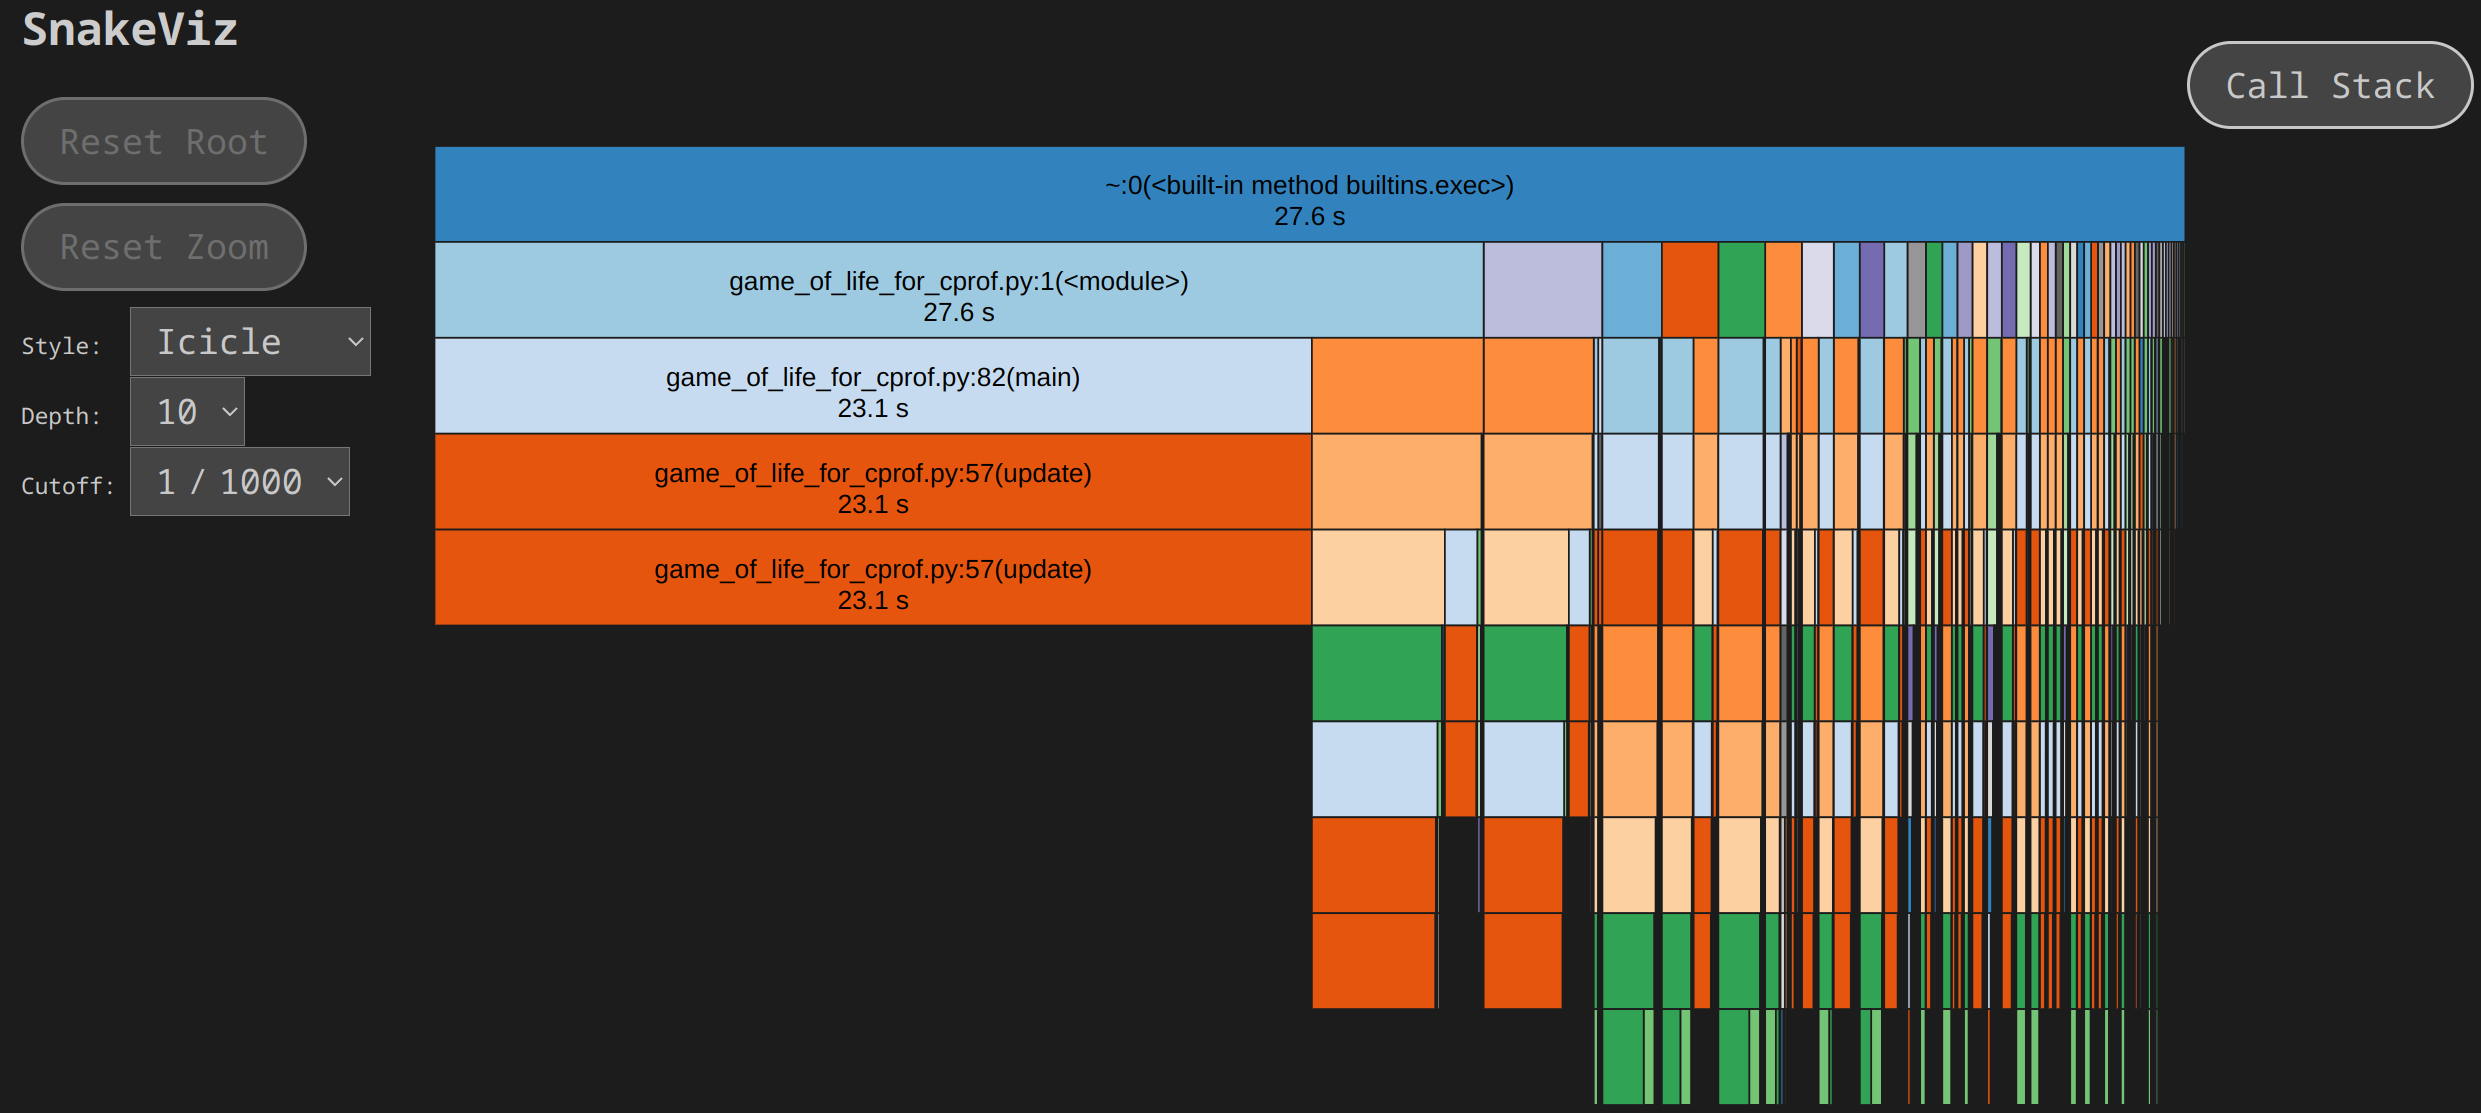

- most time spend in update => let's look at that more closely

In [2]:
# profile u pdate function with line_profiler
! kernprof -l game_of_life_for_line_prof.py --grid-size 50 --iterations 100

Simulation completed.
Wrote profile results to game_of_life_for_line_prof.py.lprof
Inspect results with:
python -m line_profiler -rmt "game_of_life_for_line_prof.py.lprof"


In [3]:
! python -m line_profiler game_of_life_for_line_prof.py.lprof

Timer unit: 1e-06 s

Total time: 8.64189 s
File: game_of_life_for_line_prof.py
Function: update at line 57

Line #      Hits         Time  Per Hit   % Time  Line Contents
    57                                           @profile
    58                                           def update(frameNum, grid, N):
    59                                               # copy grid since we require 8 neighbors for calculation
    60                                               # and we go line by line 
    61       100        822.9      8.2      0.0      newGrid = grid.copy()
    62      5100       9181.3      1.8      0.1      for i in range(N):
    63    255000     459767.7      1.8      5.3          for j in range(N):
    64                                                       # compute 8-neghbor sum
    65                                                       # using toroidal boundary conditions - x and y wrap around 
    66                                                       # so that th

- most time is spent on indexing operations in the neighbor-counting step
- maybe use vectorization to optimize this?

## Task B.4